In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Question 1: Preprocess the data

In [2]:
# This is the downloaded CSV file. Load it into this notebook
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

# Split into features and target
x = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

In [3]:
# choose one image from each class, and put them together into an array
numbers = []
for i in np.arange(10):
    numbers.append(x[np.where(y == i)][i])

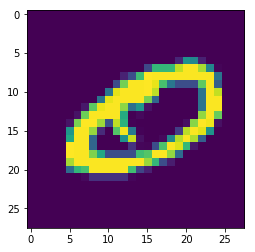

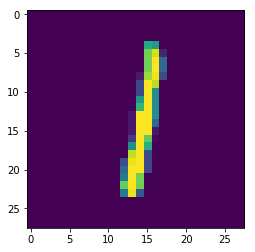

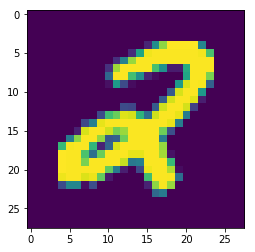

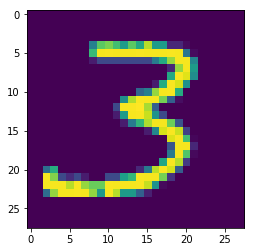

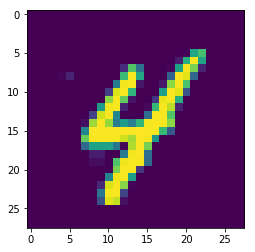

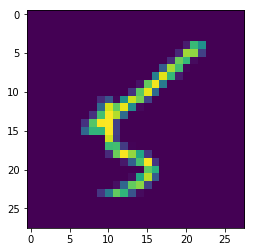

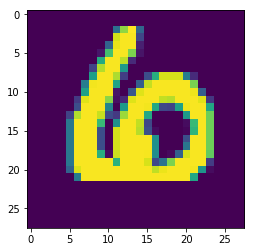

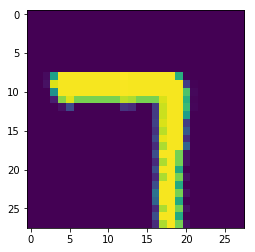

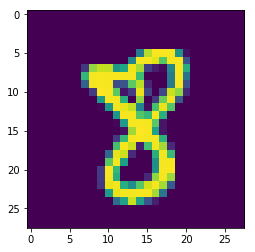

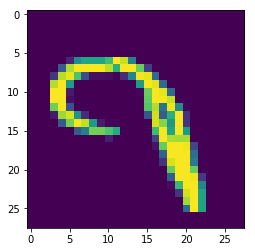

In [4]:
# Visualize one element from each class
for i in numbers:
    plt.figure()
    plt.imshow(i.reshape(28,28))
    plt.show()
   

In [5]:
# find the mean of each class, and put them together into an array
numbers = []
for i in np.arange(10):
    number = x[np.where(y == i)]
    class_mean = number.mean(axis = 0)
    numbers.append(class_mean)
    
        

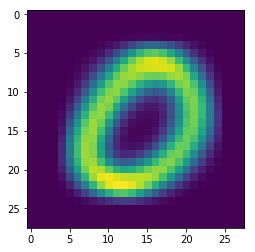

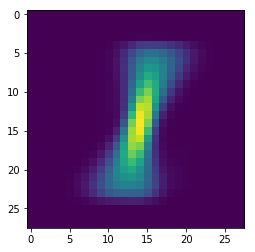

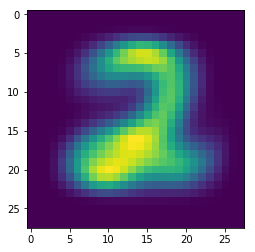

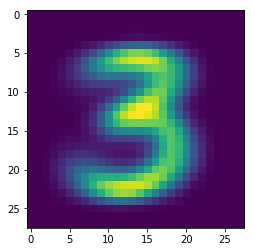

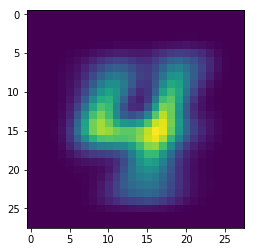

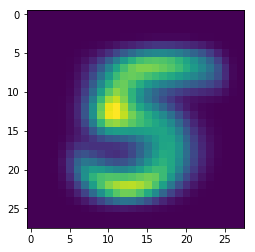

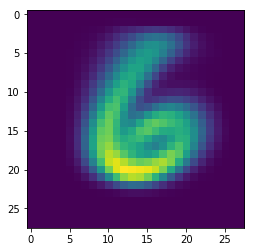

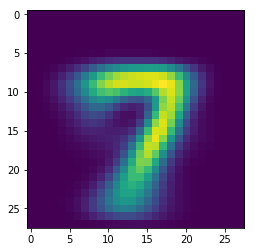

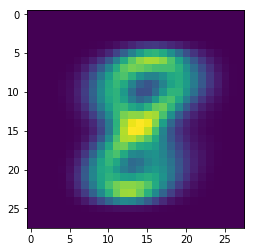

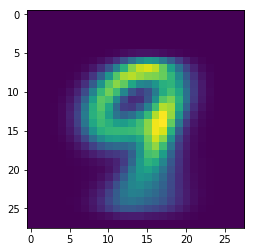

In [6]:
# Visualize the mean of each class
for i in numbers:
    plt.figure()
    plt.imshow(i.reshape(28,28))
    plt.show()
   

# Question 2(a): Reduce the dimensionality of your data using Principal Component Analysis

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify = y)


In [8]:
import time

train_accuracy_scores = []
test_accuracy_scores = []
running_time = []

for i in np.arange(1,100):
    #set the  starting time and use PCA for different values of components
    start = time.time()
    my_pca = PCA(n_components=i)
    my_pca.fit(x_train)
    x_train_new = my_pca.transform(x_train)
    x_test_new = my_pca.transform(x_test)

    # Instantiate & fit the classifier
    logistic_regression_model = LogisticRegression(solver='lbfgs')
    logistic_regression_model.fit(x_train_new, y_train)
    
    # Evaluate the model
    accuracy_train = logistic_regression_model.score(x_train_new,y_train)
    accuracy_test = logistic_regression_model.score(x_test_new,y_test)
    
    train_accuracy_scores.append(accuracy_train)
    test_accuracy_scores.append(accuracy_test)
    
    #calculate each loop running time
    end = time.time()
    run_time = end - start
    running_time.append(run_time)
    

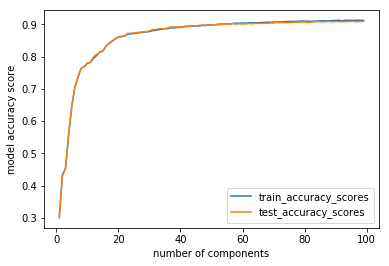

In [9]:
plt.plot(np.arange(1,100),train_accuracy_scores,label="train_accuracy_scores")
plt.plot(np.arange(1,100),test_accuracy_scores,label="test_accuracy_scores")
plt.ylabel('model accuracy score')
plt.xlabel('number of components')
plt.legend()
plt.show()

when the n_components bigger than 20, the accuracy score barely change, so i will choose n_components=20 which has accuracy score 0.82, in order to optimaize my model performance

# Question 2(b): What does reducing the dimensionality do to the computation time and why? 

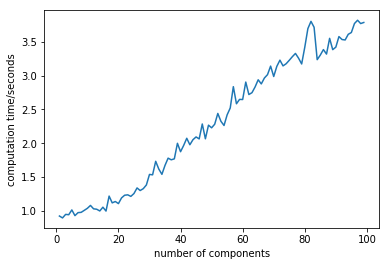

In [10]:
plt.plot(np.arange(1,100),running_time)
plt.ylabel('computation time/seconds')
plt.xlabel('number of components')
plt.show()

as we can see from above plot, the more dimensionality(more number of components), the more computation time

# Question 2(b):What does reducing the number of data points do to the computation time and why?

In [11]:
#split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify = y)

running_time = []

for i in np.arange(0.1,1.0,0.1):
    #try different number of data points by spliting the dataset into train and test by different proportion 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, stratify = y)

    #set the starting time and used PCA for number of components = 20
    start = time.time()
    my_pca = PCA(n_components=20)
    my_pca.fit(x_train)
    x_train_new = my_pca.transform(x_train)

    # Instantiate & fit the classifier
    logistic_regression_model = LogisticRegression(solver='lbfgs')
    logistic_regression_model.fit(x_train_new, y_train)
   
    #calculate each loop running time
    end = time.time()
    run_time = end - start
    running_time.append(run_time)

In [12]:
a = np.arange(0.1,1.0,0.1)
a[::-1]

array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

Text(0.5, 0, 'subset: proportion of original dataset')

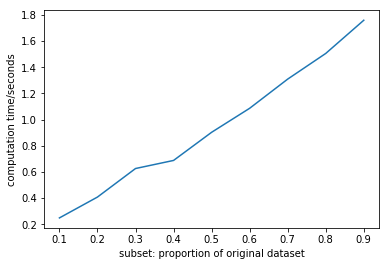

In [13]:
plt.plot(a[::-1],running_time)
plt.ylabel('computation time/seconds')
plt.xlabel('subset: proportion of original dataset')

as we can see from above plot, the more data points we use, the longer computation time will be. 

# Question 2(c): List one advantage and disadvantage of reducing dimensionality

Reducing dimensionality:

Advantage:
In a real world scenario, this is very common that you get hundreds of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph.
Also you need to find out the correlation among the features (correlated variables). Finding correlation manually in hundreds of features is very time-consuming. PCA does this for you efficiently.
After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

Disadvantage:
After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

# Question 2(c): List one advantage and disadvantage of reducing the number of data points.

Advantage: reducing the number of data points can reduce the computation time.
    
Disadvantage: the more data points we have, our sample is closer to the population. which means, we can train our model better by using more data points. also, the more data points we have, the variances of the population we can capture, when the new data comes in, we can better predict the outcome. so if we reduce the number of data points, we lose some variance and some predictive powers.

# Question 3(a):Train two KNN classifiers to model the data: one where K=1 and one where K=the number of training points. For each model, evaluate its accuracy on the training set and on the test set.Can you explain the results you see?

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Instantiate the KNN model & fit it to our data, choose n_neighbors=1
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

# Predict the class of our train data points and test data points
print(f"train accuracy score k=1: {KNN_model.score(x_train,y_train)}")
print(f"test accuracy score k=1: {KNN_model.score(x_test,y_test)}")


# Instantiate the KNN model & fit it to our data, choose n_neighbors=5
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

# Predict the class of our train data points and test data points
print(f"train accuracy score k=5: {KNN_model.score(x_train,y_train)}")
print(f"test accuracy score k=5: {KNN_model.score(x_test,y_test)}")

train accuracy score k=1: 1.0
test accuracy score k=1: 0.9617142857142857
train accuracy score k=5: 0.9753928571428572
test accuracy score k=5: 0.961


because it will take very very long time to compute different values of K, so i only choose k=1 and k=5.
the accuracy score for k=1 and k=5 are very close to 0.96. theoritically, larger values of K will have smoother decision boundaries which means lower variance but increased bias, this is the tradeoff

# Qustion 3(b):Based on your results from Question 3a, try to find an ideal number of neighbors for your KNN classifier. For each value of K that you explore, evaluate the accuracy of the model on the training set and on the test set. What seems to be an ideal value for K, and why is it ideal?

In [15]:
# subset the original dataset to make it smaller in order to reduce computation time
# i only take 50 percent of the original data, and split them into train_new and test_new datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train, y_train, test_size=0.3)

# reduce the data’s dimensionality by using PCA
# try different value of n_components and see how well them expain the variancce of the original dataset 
total_variance_explained_by_PCA = []

for i in np.arange(1,51):
    my_pca = PCA(n_components=i)
    my_pca.fit(x_train_new)
    total_variance_explained_by_PCA.append(my_pca.explained_variance_ratio_)


[0.09590628688834338, 0.16760401284286283, 0.2291365775873361, 0.28362432684655786, 0.3315432767002243, 0.3746309265878868, 0.4076360505583444, 0.4368448016857504, 0.4641474925401624, 0.48785867249288817, 0.5086714125848661, 0.5289088035222306, 0.5460441516597415, 0.5628671894864903, 0.5785958539591285, 0.593706539039532, 0.6070621831081616, 0.6198715272815175, 0.63210684961638, 0.6437438638213921, 0.6544667016784921, 0.6647667315267471, 0.6742692564723669, 0.6834235462606173, 0.6923800682159578, 0.700824793197663, 0.7089028114241808, 0.7169440472986831, 0.7243154226573203, 0.7313104228310304, 0.7378950265162957, 0.7444210531004027, 0.7504942257100923, 0.756398698656946, 0.7621051656344815, 0.7675448856674008, 0.7726479977285602, 0.7775425558919848, 0.7823783735662033, 0.7871391847134241, 0.7916557942228726, 0.7961405867004612, 0.8003120864645534, 0.8043235526514498, 0.8081571927119569, 0.8119580410720905, 0.8155025163144121, 0.8189366409621399, 0.8222688509176151, 0.8255042736202133]


Text(0.5, 0, 'number of components')

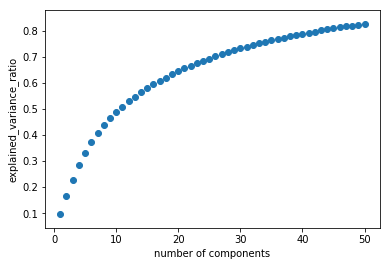

In [16]:
explained_ratio = []

for ratio in total_variance_explained_by_PCA:
    a = np.sum(ratio)
    explained_ratio.append(a)

print(explained_ratio)
plt.scatter(np.arange(1,51),explained_ratio)
plt.ylabel('explained_variance_ratio')
plt.xlabel('number of components')

from about 35 components to 50, the explained variance ratio does not increase much, so i will choose n_components = 35 for fitting the model since it can explain majority of the variance 

In [17]:
# reduce the data’s dimensionality by using PCA (n_components = 35), and transform the data
my_pca = PCA(n_components=35)
my_pca.fit(x_train_new)
x_train_new = my_pca.transform(x_train_new)
x_test_new = my_pca.transform(x_test_new)

# fit KNN model to the data and calcualte the accuracy score for each K value we choose 
train_scores = []
test_scores = []
length = (np.arange(101))[1:]
for i in length:
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train_new,y_train_new)
    train_scores.append(KNN_model.score(x_train_new,y_train_new))
    test_scores.append(KNN_model.score(x_test_new,y_test_new))
    

because it will take very very long time to compute all different values of K, so i only try k-value from 1 to 100

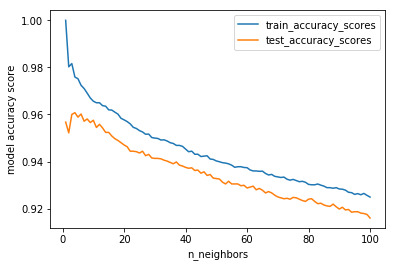

In [18]:
plt.plot((np.arange(101))[1:],train_scores,label="train_accuracy_scores")
plt.plot((np.arange(101))[1:],test_scores,label="test_accuracy_scores")
plt.ylabel('model accuracy score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

from above plot, we can see the accuracy score only decrease 0.02 when n_neighors increase from 40 to 100.
but increasing the n_neighors values will dramatically increase the computation time. so the ideal k value should be 
k = 40

# Question 3(c):Build another model to predict which digit is written, this time using a decision tree. Instead of controlling for the K-value, control for the depth of the tree. Document your model-fitting and model-evaluation process clearly

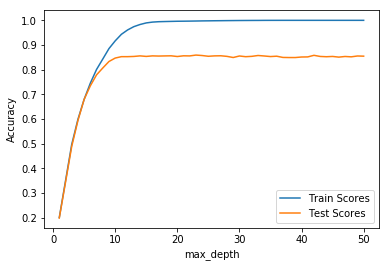

In [19]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_scores = []
test_scores = []
for i in np.arange(1,51):
    # Instantiate the model
    my_tree = DecisionTreeClassifier(max_depth = i)

    # Fit model
    my_tree.fit(x_train,y_train)

    # accuracy score
    train_scores.append(my_tree.score(x_train,y_train))
    test_scores.append(my_tree.score(x_test,y_test))

plt.figure()
plt.plot(np.arange(1,51),train_scores,label = "Train Scores")
plt.plot(np.arange(1,51),test_scores,label="Test Scores")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

we can see from above graph, the accuracy score increase a lot from 0.2 to about 0.85 for both train and test sets when the max_depth increased from 1 to 10. but when the max_depth increase from 10 to 50, the accuracy barely change.
so the ideal max_depth should be 10

# Question 4(a): Fit a logistic regression model and use 5-fold cross-validation to optimize its hyperparameters. For each hyperparameter that you’re tuning, describe what it controls in your model. What are the optimal hyperparameters that you found?

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# the original dataset is way too big, so i only used 10 percent of the data for fitting the model
x,x_remain,y,y_remain = train_test_split(x,y,test_size = 0.9,random_state=1)

#Store the results
validation_score_list = []

sample_range = np.arange(0.5,5.0,0.50)

#cross validation for different C value
for i in sample_range :
    print(f'starting{i}')
    LR_model = LogisticRegression(C=i)
    print('instantiate model')
    validation_score = np.mean(cross_val_score(LR_model, x, y, cv = 5))
    print('find mean score for each c_value')
    validation_score_list.append(validation_score)
    print('append scores to list')



starting0.5
instantiate model
find mean score for each c_value
append scores to list
starting1.0
instantiate model
find mean score for each c_value
append scores to list
starting1.5
instantiate model
find mean score for each c_value
append scores to list
starting2.0
instantiate model
find mean score for each c_value
append scores to list
starting2.5
instantiate model
find mean score for each c_value
append scores to list
starting3.0
instantiate model
find mean score for each c_value
append scores to list
starting3.5
instantiate model
find mean score for each c_value
append scores to list
starting4.0
instantiate model
find mean score for each c_value
append scores to list
starting4.5
instantiate model
find mean score for each c_value
append scores to list


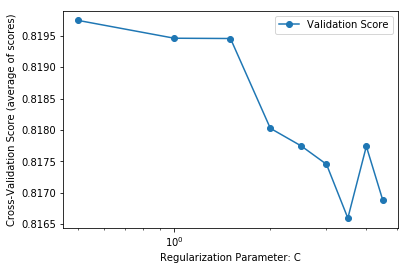

In [37]:
plt.plot(sample_range, validation_score_list,label="Validation Score", marker='o')
plt.xscale('log')
plt.legend()
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross-Validation Score (average of scores)')
plt.show();

In [38]:
print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)

Best Model:  1


since it takes very very long time to compute a  big range of c value, so i only try k from 0.5 to 5 and the stepsize is 0.5. the optimal hyperparameter is c=0.5,it has the highest cross-validation score about 0.82, the parameter c-value of logistic regression is to control how much regulization the model should have. the bigger c-value is, the less regulization the model have

# Question 4(b): What does the confusion matrix look like for your best model? Interpret the confusion matrix. Where is your model strongest and weakest? (Suggestion: Use Seaborn’s sns.heatmap() to plot the confusion matrix with the argument ‘annot=True’.)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# the original dataset is way too big, so i only used 50 percent of the original dataset
x,x_remain,y,y_remain = train_test_split(x,y,test_size = 0.5,random_state=1)
x_train,x_test,y_train,y_test = train_test_split(x_remain,y_remain,test_size = 0.4,random_state=1)

LR_model = LogisticRegression(C=0.5)
print('instantiate model')
LR_model.fit(x_train,y_train)
print('fit model')
y_pred = LR_model.predict(x_test)
print('model prediction')
confusion = confusion_matrix(y_test, y_pred)
print('generate confusion matrix')
print(confusion)

instantiate model
fit model
model prediction
generate confusion matrix
[[637   0   5   3   3  11   7   4  12   3]
 [  0 726  11   5   3   9   4   2   9   3]
 [  7  16 548  28  19   9  14  13  27   5]
 [  9   2  39 581   7  27   3  15  31  19]
 [  1   0   5   5 589   9  11  13  24  34]
 [ 12  10  13  30  12 509  20   5  26   6]
 [  5   2  17   0  10  13 613   1  17   1]
 [  4   2  10  12   8   4   0 650   7  44]
 [  6  15  23  21   8  25   7   5 536  15]
 [  9   4   3  11  31  12   1  53  17 568]]


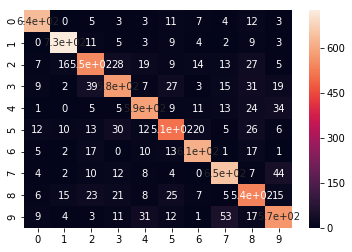

In [4]:
import seaborn as sns
sns.heatmap(confusion, annot=True)


The Key concept of confusion matrix is that it calculates the number of correct & incorrect predictions which is further summarized with the number of count values and breakdown into each classes.
strongest of the model: the vairance is high, the model can capture and classify all the digits.
weakest of the model: the bias is high too, the model did a relative good job on classifying digits 2,4,5,8,9 but not for digits 1,6,7

# Question 4(c): Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image. What can you learn from this image about how your classifier distinguishes 4s from 9s?

In [8]:
x = mnist_csv[:, :-1]
y = mnist_csv[:, -1]
x = x[np.where((y==4)|(y==9))]
y = y[np.where((y==4)|(y==9))]

In [9]:
print(y.shape)
print(x.shape)

(6860,)
(6860, 784)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y)

#instantiate and fit a logistic model
logistic_regression_model = LogisticRegression(solver='lbfgs')
logistic_regression_model.fit(x_train, y_train)

/Users/angelali/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# Evaluate the model
accuracy_train = logistic_regression_model.score(x_train,y_train)
accuracy_test = logistic_regression_model.score(x_test,y_test)

print(accuracy_train)
print(accuracy_test)

0.9907069970845481
0.9584548104956269


In [12]:
coefficients = logistic_regression_model.coef_

In [13]:
coefficients.shape

(1, 784)

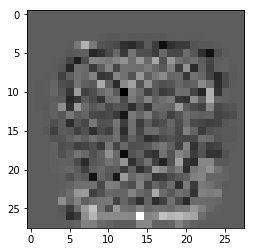

In [18]:
plt.figure()
plt.imshow(coefficients.reshape(28,28),cmap='gray')
plt.show()


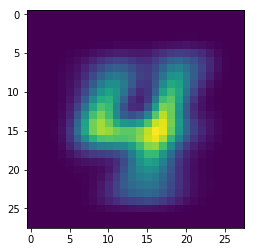

In [19]:
digit4 = x[np.where(y==4)]
digit9 = x[np.where(y==9)]

digit4_mean = digit4.mean(axis = 0)
digit9_mean = digit9.mean(axis = 0)    
    
plt.figure()
plt.imshow(digit4_mean.reshape(28,28))
plt.imshow(digit4_mean.reshape(28,28))
plt.show()
   

since digit 4 and 9 can look similar when it comes to handwriting. but the model did a good job to discriminate them, and have above 95 percent accuracy on prediction for both train and test sets.

# Question 5:

In [10]:
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
x = mnist_csv[:, :-1]
y = mnist_csv[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
# give our estimators as a list of tuples: name:function
estimators = [('reduce_dim', PCA(n_components=35)),
              ('KNN', KNeighborsClassifier(n_neighbors=40))]

# make my KNN model as pipeline
KNN_model = Pipeline(estimators)

In [12]:
KNN_model

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform'))])

In [14]:
# fit the model
KNN_model.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform'))])

In [15]:
## test score
KNN_model.score(x_test, y_test)

0.9577142857142857

In [16]:
## # save the model to disk

filename = 'KNN_model.sav'
joblib.dump(KNN_model, filename)

['KNN_model.sav']

In [17]:
# load the model from disk, and try the test score again

loaded_model = joblib.load('KNN_model.sav')
model_accuracy = loaded_model.score(x_test, y_test)
print(model_accuracy)

0.9577142857142857
